In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os
from tensorflow import keras


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:


base_dir = '/content/drive/MyDrive/Potato model/data'

img_size = 224
batch = 64


In [5]:
# Create a data augmentor
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,
								zoom_range=0.2, horizontal_flip=True,
								validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255,
								validation_split=0.2)

# Create datasets
train_datagen = train_datagen.flow_from_directory(base_dir,
												target_size=(
													img_size, img_size),
												subset='training',
												batch_size=batch)
test_datagen = test_datagen.flow_from_directory(base_dir,
												target_size=(
													img_size, img_size),
												subset='validation',
												batch_size=batch)


Found 240 images belonging to 3 classes.
Found 59 images belonging to 3 classes.


In [12]:
model = Sequential()

# First Convolutional Block
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same',
                 activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Third Convolutional Block
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Fourth Convolutional Block
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Fully Connected Layers
model.add(Flatten())  # Flatten the 3D outputs to 1D
model.add(Dense(512))  # Fully connected layer with 512 neurons
model.add(Activation('relu'))  # ReLU activation function

# Output Layer
model.add(Dense(3, activation="softmax"))  # 4 output neurons (for 4 classes)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 64)        │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,540,227 (24.95 MB)

 Trainable params: 6,540,227 (24.95 MB)

 Non-trainable params: 0 (0.00 B)

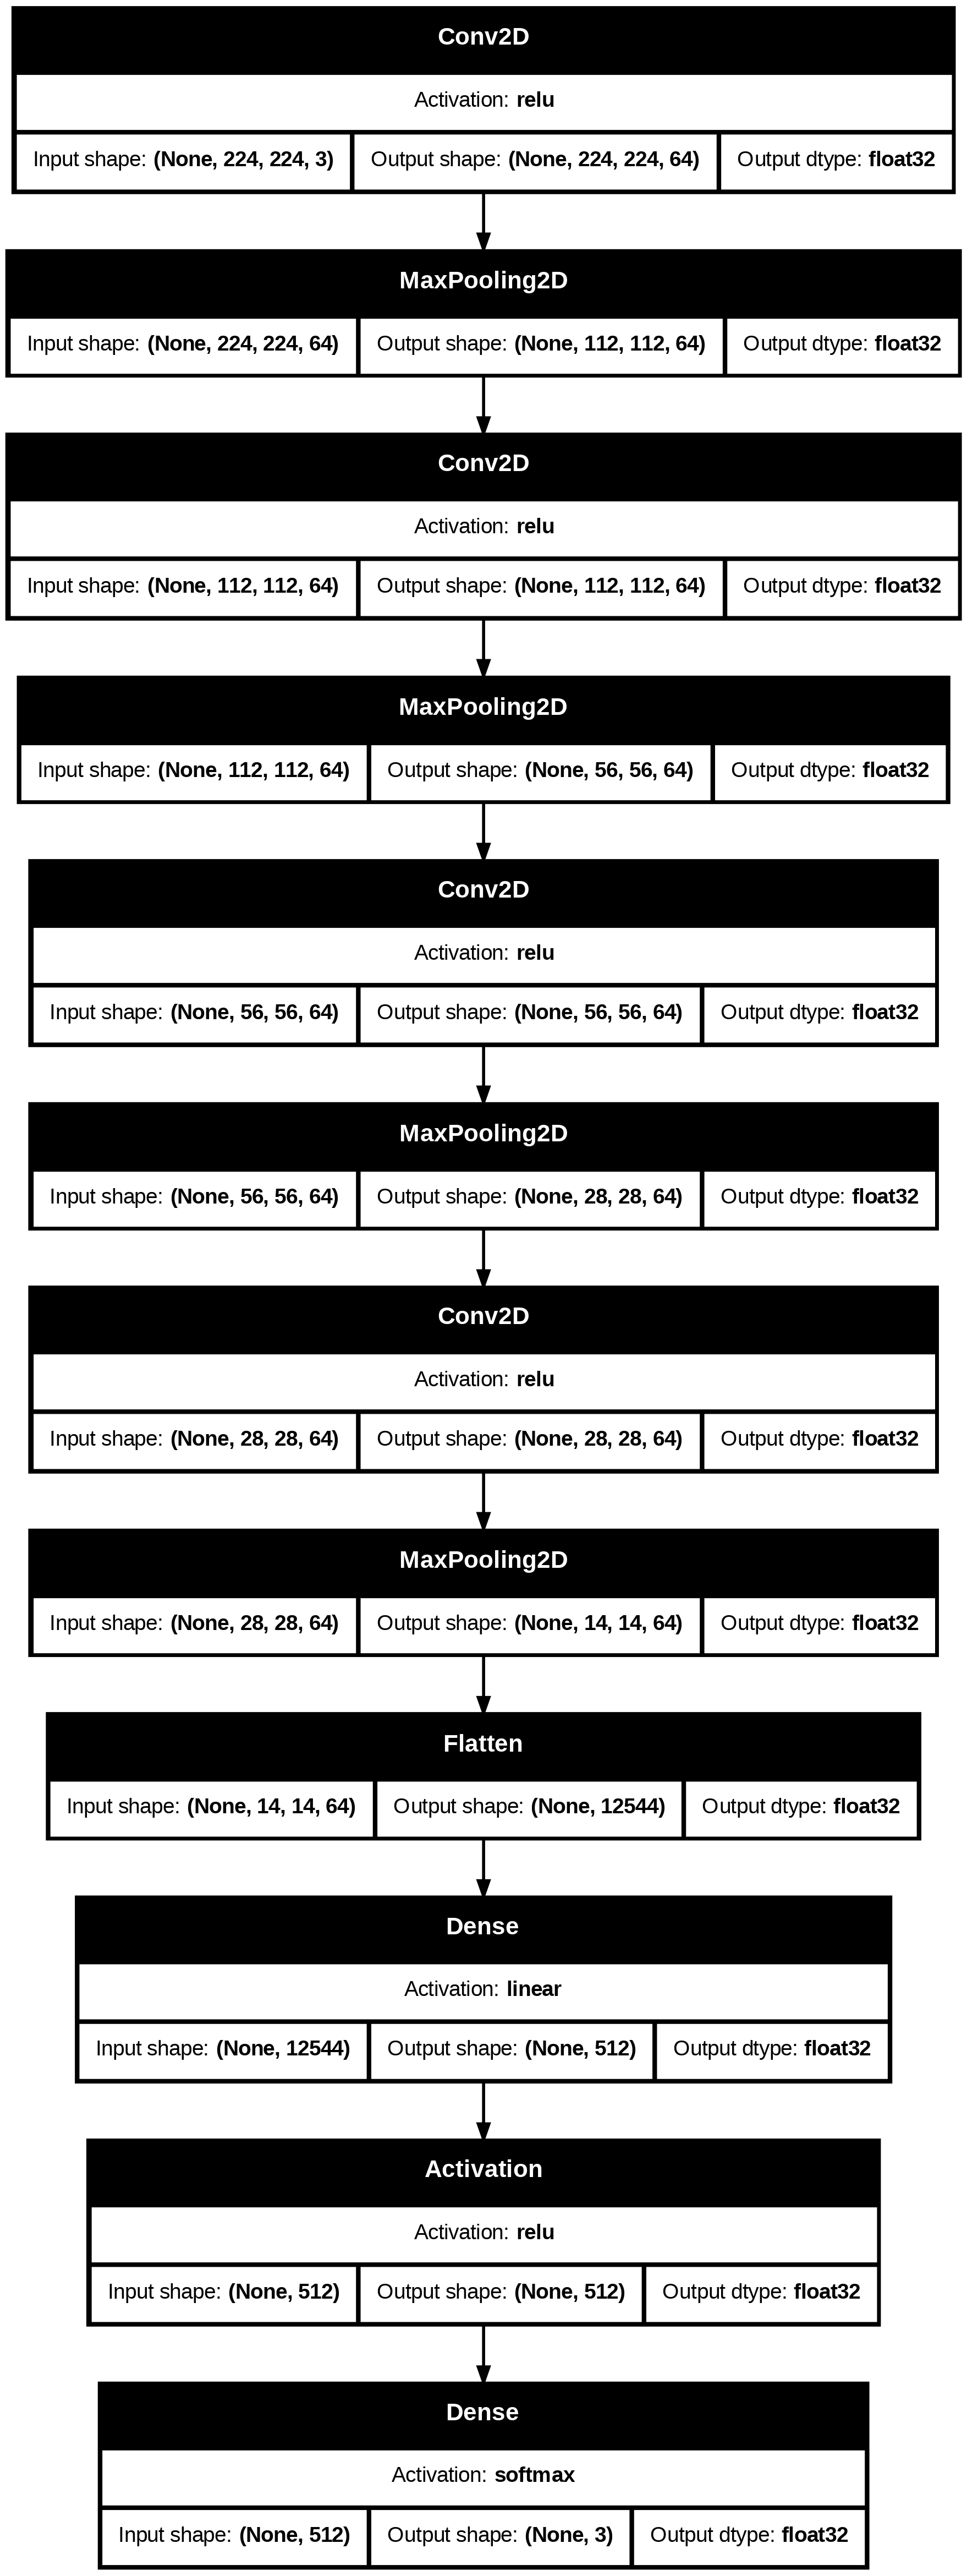

In [14]:
keras.utils.plot_model(
	model,
	show_shapes = True,
	show_dtype = True,
	show_layer_activations = True
)


In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
epochs=30
model.fit(train_datagen,epochs=epochs,validation_data=test_datagen)


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3596 - loss: 1.2125

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 39s 8s/step - accuracy: 0.3560 - loss: 1.2116 - val_accuracy: 0.3390 - val_loss: 1.1050
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 901ms/step - accuracy: 0.3438 - loss: 1.1031 - val_accuracy: 0.3220 - val_loss: 1.0983
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 912ms/step - accuracy: 0.3487 - loss: 1.0975 - val_accuracy: 0.3220 - val_loss: 1.0922
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3268 - loss: 1.0928 - val_accuracy: 0.3390 - val_loss: 1.0935
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 901ms/step - accuracy: 0.3302 - loss: 1.0915 - val_accuracy: 0.3898 - val_loss: 1.0765
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 896ms/step - accuracy: 0.4838 - loss: 1.0692 - val_accuracy: 0.4746 - val_loss: 1.0556
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5079 - loss: 1.0346 - val_accuracy: 0.3898 - val_loss: 1.0248
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5064 - loss: 0.9160 - val_accuracy: 0.5763 - val_loss: 0.8130
Epoch 9/30
4/4

In [17]:
print(train_datagen.class_indices)


{'Healthy': 0, 'Potato_Leate_blight': 1, 'Potato___Early_blight': 2}


In [18]:
import os
from tensorflow.keras.models import load_model


model_path = os.path.join('/content/drive/MyDrive/skin_disease', 'Model.h5')

# Save the model
model.save(model_path)

# Load the model
savedModel = load_model(model_path)

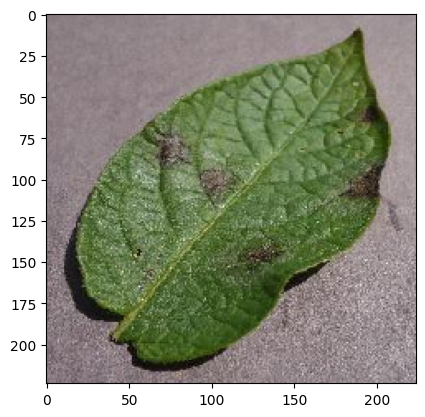

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction probabilities: [[0. 1. 0.]]
Predicted Class: Potato_Late_blight


In [23]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os # Import os to check file existence
from tensorflow.keras.models import load_model

list_ = ['Healthy', 'Potato_Late_blight', 'Potato___Early_blight',]

# Input image
test_image = image.load_img('/content/drive/MyDrive/Potato model/Potato_Late_blight.test/ff03a125-445b-40e1-a7ed-0bb9b155dfd8___RS_LB 5039.JPG', target_size=(224,224))
# Show image
plt.imshow(test_image)
plt.show()

# Preprocess the image
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Predict using the loaded model (if loaded successfully)
if savedModel is not None:
    result = savedModel.predict(test_image)
    print("Prediction probabilities:", result)

    # Find the class with the highest probability
    predicted_class_index = np.argmax(result[0])
    predicted_class = list_[predicted_class_index]
    print("Predicted Class:", predicted_class)

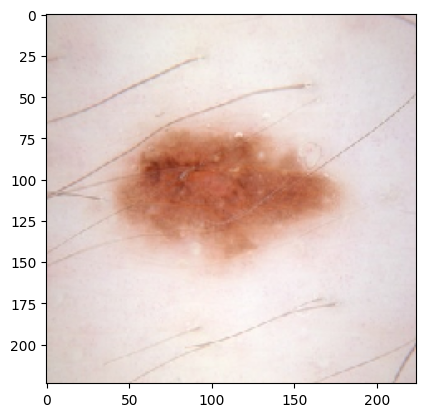

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction probabilities: [[3.7448884e-24 0.0000000e+00 0.0000000e+00 1.0000000e+00]]
Predicted Class: MEL


In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import load_model

# list of maping
list_ = ['ACNE', 'AK', 'BCC', 'MEL']

test_image = image.load_img('/content/drive/MyDrive/skin_disease/test/image2.jpeg', target_size=(224,224))
# Show image
plt.imshow(test_image)
plt.show()

# Preprocess the image
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Predict using the loaded model (if loaded successfully)
if savedModel is not None:
    result = savedModel.predict(test_image)
    print("Prediction probabilities:", result)

    # Find the class with the highest probability
    predicted_class_index = np.argmax(result[0])
    predicted_class = list_[predicted_class_index]
    print("Predicted Class:", predicted_class)

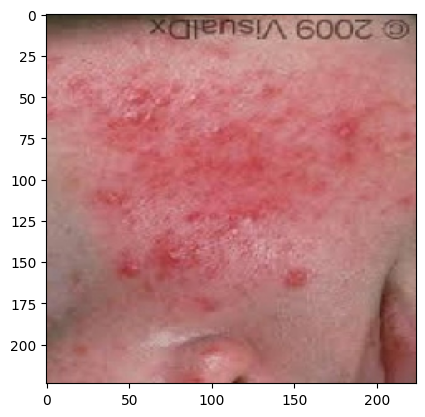

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prediction probabilities: [[1. 0. 0. 0.]]
Predicted Class: ACNE


In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import load_model

# list of maping
list_ = ['ACNE', 'AK', 'BCC', 'MEL']

test_image = image.load_img('/content/drive/MyDrive/skin_disease/test/image3.jpeg', target_size=(224,224))
# Show image
plt.imshow(test_image)
plt.show()

# Preprocess the image
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Predict using the loaded model (if loaded successfully)
if savedModel is not None:
    result = savedModel.predict(test_image)
    print("Prediction probabilities:", result)

    # Find the class with the highest probability
    predicted_class_index = np.argmax(result[0])
    predicted_class = list_[predicted_class_index]
    print("Predicted Class:", predicted_class)

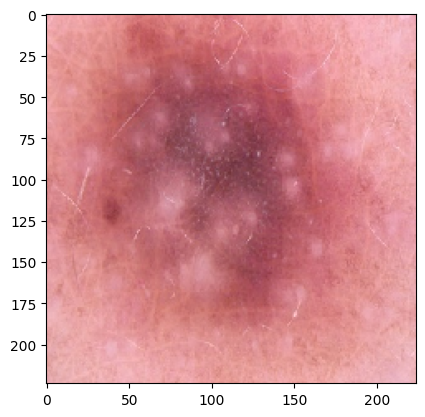

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction probabilities: [[6.3817687e-02 9.3602216e-01 1.6018741e-04 4.0253290e-08]]
Predicted Class: AK


In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import load_model

# list of maping
list_ = ['ACNE', 'AK', 'BCC', 'MEL']

test_image = image.load_img('/content/drive/MyDrive/skin_disease/test/image4.jpeg', target_size=(224,224))
# Show image
plt.imshow(test_image)
plt.show()

# Preprocess the image
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Predict using the loaded model (if loaded successfully)
if savedModel is not None:
    result = savedModel.predict(test_image)
    print("Prediction probabilities:", result)

    # Find the class with the highest probability
    predicted_class_index = np.argmax(result[0])
    predicted_class = list_[predicted_class_index]
    print("Predicted Class:", predicted_class)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 342s 31s/step


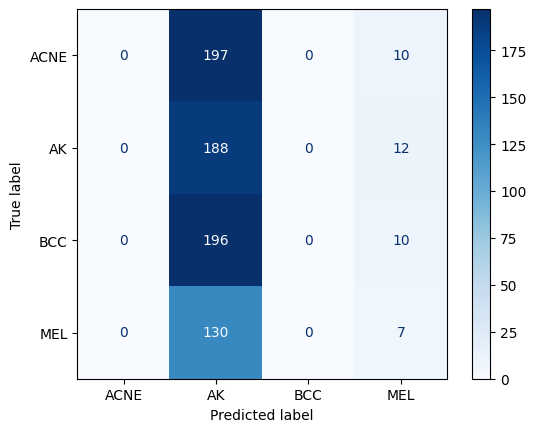

In [ ]:
import os
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Updated list for mapping
list_ = ['ACNE', 'AK', 'BCC', 'MEL']

model_path = os.path.join('/content/drive/MyDrive/skin_disease', 'Model.h5')
savedModel = load_model(model_path)

y_true = test_datagen.classes
y_pred = savedModel.predict(test_datagen)
y_pred = np.argmax(y_pred, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, classification_report

# Updated list for mapping
list_ = ['ACNE', 'AK', 'BCC', 'MEL']

# Get true labels and predictions
y_true = test_datagen.classes
y_pred = savedModel.predict(test_datagen)
y_pred = np.argmax(y_pred, axis=1)

# Calculate F1 Scores
# Micro average
f1_micro = f1_score(y_true, y_pred, average='micro')

# Macro average
f1_macro = f1_score(y_true, y_pred, average='macro')

# Weighted average
f1_weighted = f1_score(y_true, y_pred, average='weighted')

# Per-class F1 scores
f1_per_class = f1_score(y_true, y_pred, average=None)

# Print results
print("\nF1 Scores:")
print("Micro F1 Score:", f1_micro)
print("Macro F1 Score:", f1_macro)
print("Weighted F1 Score:", f1_weighted)

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_true, y_pred, target_names=list_))

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 284ms/step

F1 Scores:
Micro F1 Score: 0.2942643391521197
Macro F1 Score: 0.27198628087672516
Weighted F1 Score: 0.27148240005142177

Detailed Classification Report:
              precision    recall  f1-score   support

        ACNE       0.30      0.33      0.31       100
          AK       0.12      0.05      0.07       101
         BCC       0.33      0.49      0.40       100
         MEL       0.31      0.31      0.31       100

    accuracy                           0.29       401
   macro avg       0.26      0.29      0.27       401
weighted avg       0.26      0.29      0.27       401



7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 335ms/step


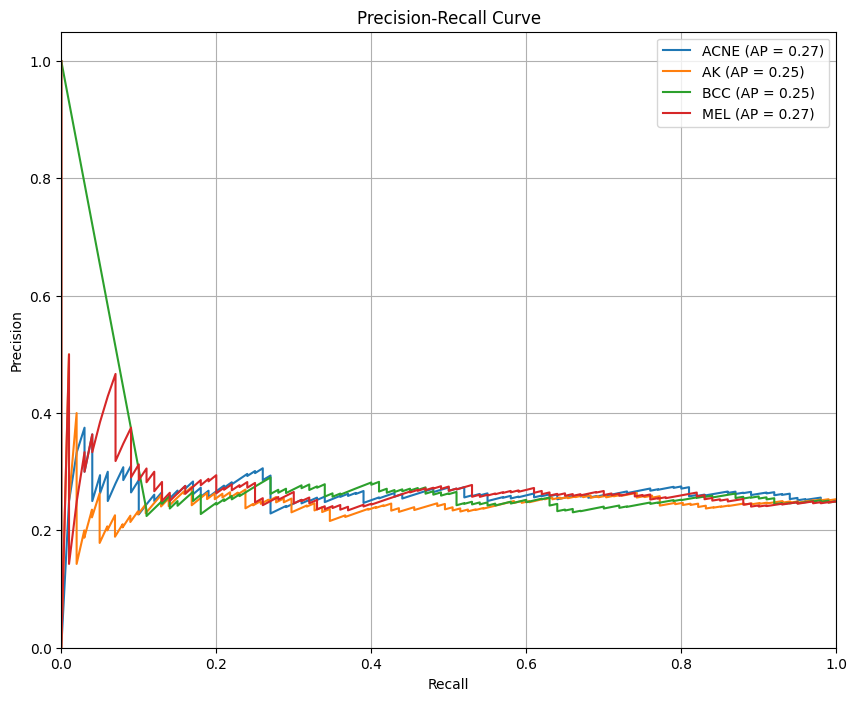

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Updated list for mapping
list_ = ['ACNE', 'AK', 'BCC', 'MEL']

# Get true labels and prediction probabilities
y_true = test_datagen.classes
y_pred_proba = savedModel.predict(test_datagen)

# Create a figure
plt.figure(figsize=(10, 8))

# Precision-Recall curve for each class
for i, class_name in enumerate(list_):
    # Binary classification for each class (one-vs-rest)
    y_true_binary = (y_true == i).astype(int)
    y_pred_class_proba = y_pred_proba[:, i]

    # Compute precision-recall curve
    precision, recall, _ = precision_recall_curve(y_true_binary, y_pred_class_proba)

    # Compute average precision
    avg_precision = average_precision_score(y_true_binary, y_pred_class_proba)

    # Plot precision-recall curve
    plt.plot(recall, precision, label=f'{class_name} (AP = {avg_precision:.2f})')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.show()

NameError: name 'history' is not defined

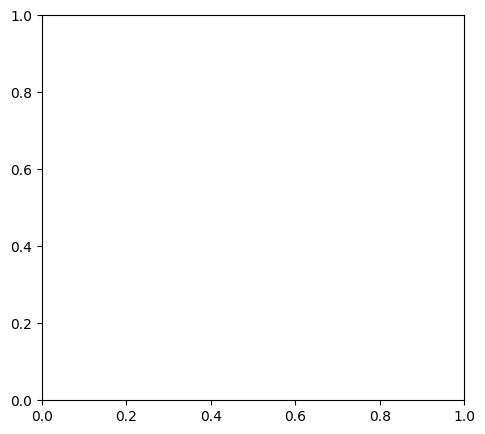

In [ ]:
import matplotlib.pyplot as plt

# Assuming you saved the training history during model training
# If you didn't save it during training, this won't work

plt.figure(figsize=(12, 5))

# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 878ms/step - accuracy: 0.9452 - loss: 0.1382 - val_accuracy: 0.7506 - val_loss: 1.6365
Epoch 2/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 809ms/step - accuracy: 0.9537 - loss: 0.1063 - val_accuracy: 0.7631 - val_loss: 1.6661
Epoch 3/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 833ms/step - accuracy: 0.9650 - loss: 0.0939 - val_accuracy: 0.8130 - val_loss: 1.5309
Epoch 4/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 814ms/step - accuracy: 0.9680 - loss: 0.0849 - val_accuracy: 0.7531 - val_loss: 1.7271
Epoch 5/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 808ms/step - accuracy: 0.9752 - loss: 0.0735 - val_accuracy: 0.7082 - val_loss: 1.8529
Epoch 6/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 28s 797ms/step - accuracy: 0.9771 - loss: 0.0689 - val_accuracy: 0.7955 - val_loss: 2.2816
Epoch 7/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 800ms/step - accuracy: 0.9755 - loss: 0.0617 - val_accuracy: 0.6758 - val_loss: 2.2531
Epoch 8/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 806ms/step - accuracy: 0.9325 - loss: 0.1841 - val_accu

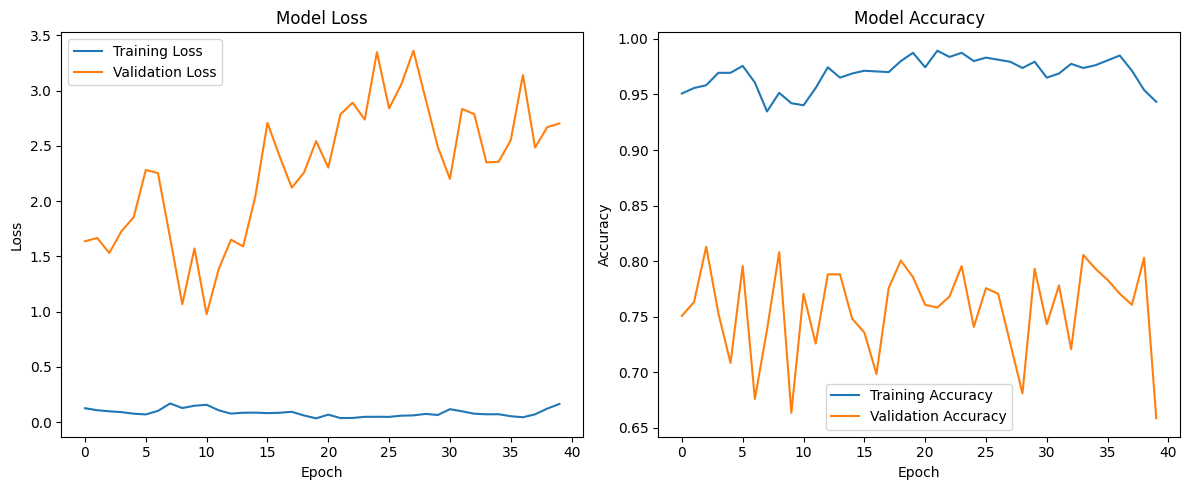

In [ ]:

epochs = 30

history = model.fit(train_datagen,
                    epochs=epochs,
                    validation_data=test_datagen)

# Plot Training & Validation Metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()